In [1]:
'''####### '''

'####### '

In [2]:
import numpy as np
import pickle
#import operator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from gensim import corpora, models

In [3]:
dataset = 'imagenet'
percentileset = 'imagenet'


image_fc6 = np.load('data/' + dataset + '_fc6.npy')             ######### dataset fc6
percentile_fc6 = np.load('data/' + percentileset + '_percentile_fc6.npy')
# Load image id list
img_list = np.load('data/' + dataset + '_raw_image_list.npy')      ######### dataset image list

In [4]:
binary_vector_fc6 = np.greater(image_fc6, percentile_fc6).astype(int)  ###########

In [5]:
print("Data shape: ", binary_vector_fc6.shape)
print("Number of 1s: ", np.sum(binary_vector_fc6 == 1))
print("Number of 0s: ", np.sum(binary_vector_fc6 == 0))
print("Anomailes: ",np.sum([binary_vector_fc6 < 0]))

Data shape:  (2946, 4096)
Number of 1s:  1208320
Number of 0s:  10858496
Anomailes:  0


In [6]:
# Define parameters for topic modelling
num_topics = [20]#[10,20, 50]
num_words = 4096    # Number of top features to be displayed per topic
num_images = binary_vector_fc6.shape[0]

In [7]:
# Prepare for corpus
corpus_fc6 = [[(j, binary_vector_fc6[i, j]) for j in range(num_words) if binary_vector_fc6[i, j]==1] for i in range(num_images)]
corpora.MmCorpus.serialize('data/corpus_fc6.mm', corpus_fc6)

# Load corpus
corpus = corpora.MmCorpus('data/corpus_fc6.mm')
print(corpus[:2])


In [8]:
for K in num_topics:
    # Create the Topic Model
    model_name = str(K) + '-topics.model'
    lda = models.ldamodel.LdaModel(corpus, num_topics = K)
    lda.save('data/' + model_name)

    # Get topic for each image
    img_by_topic = [[] for _ in range(K)]
    for i in range(num_images):
        ind, val = sorted(lda.get_document_topics(corpus[i]), key=lambda x:x[1])[-1]
        img_by_topic[ind].append((i, val))

    for j in range(K):
        img_by_topic[j].sort(key = lambda x: -x[1])

    # Save results
    with open("data/" + str(K) + "-topic-res-fc6.txt", "wb") as fp:
        pickle.dump(img_by_topic, fp)

# # Or load the saved model
# ldamodel = gensim.models.ldamodel.LdaModel.load("../2 topics/"+model_name)

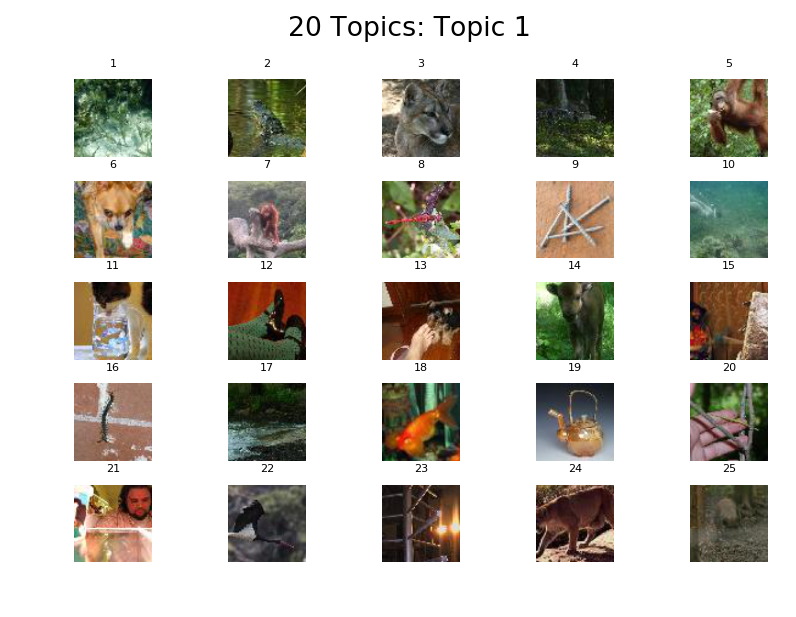

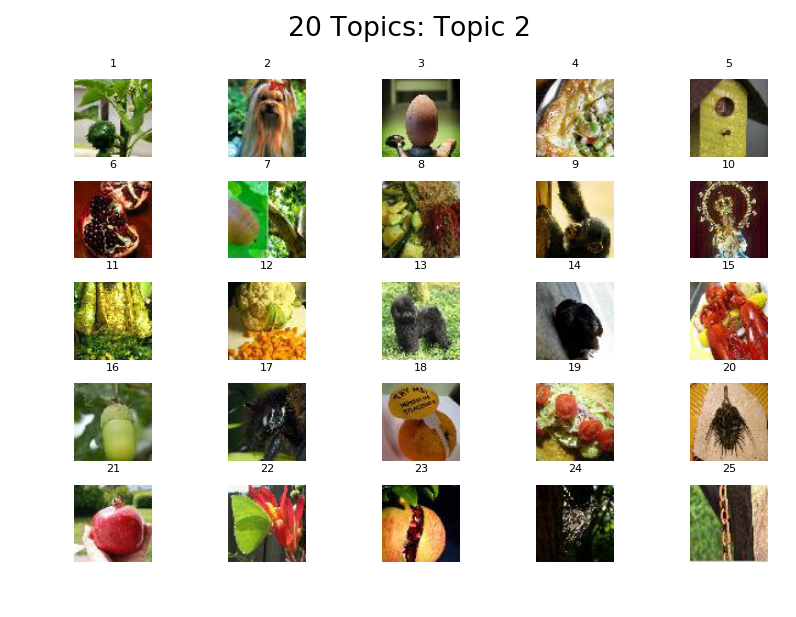

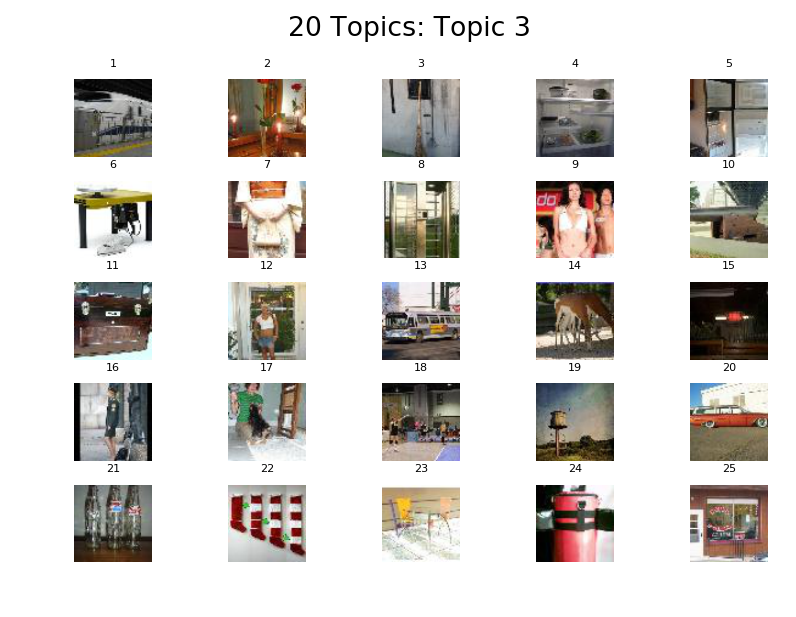

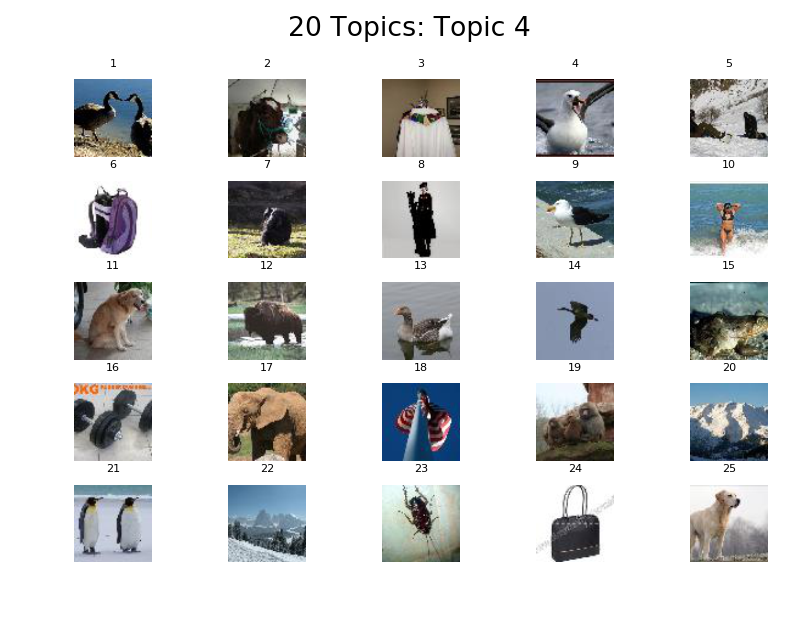

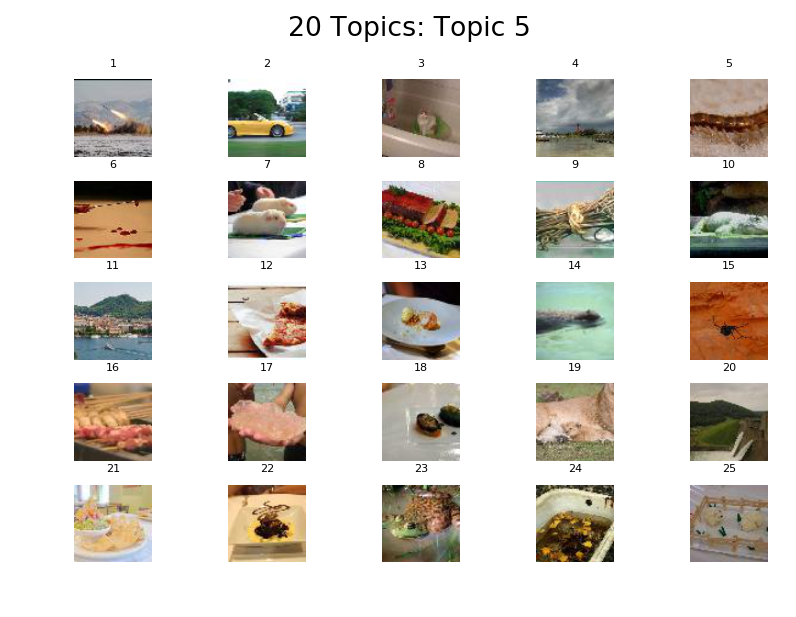

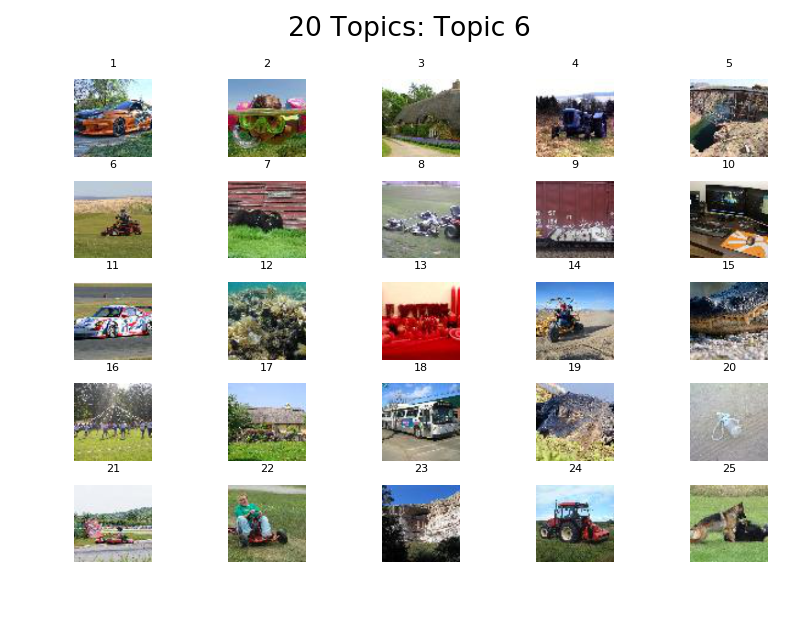

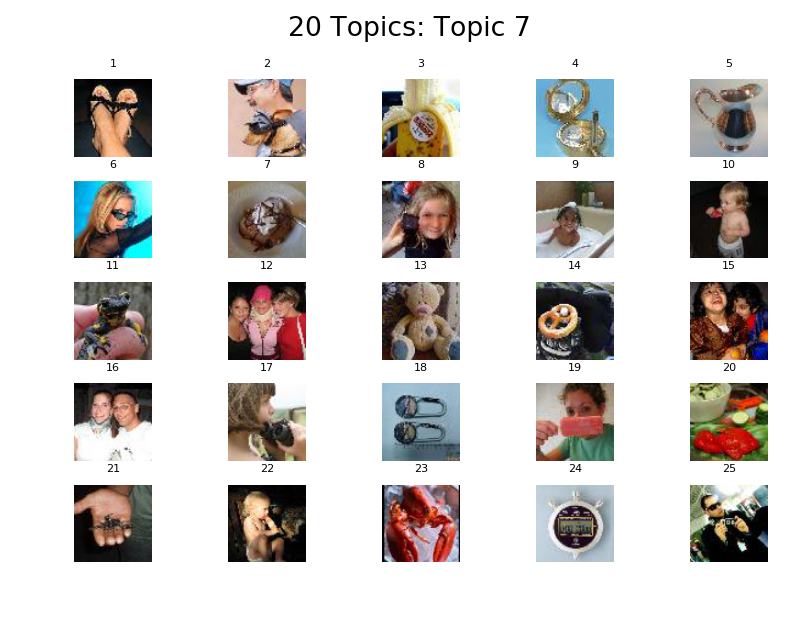

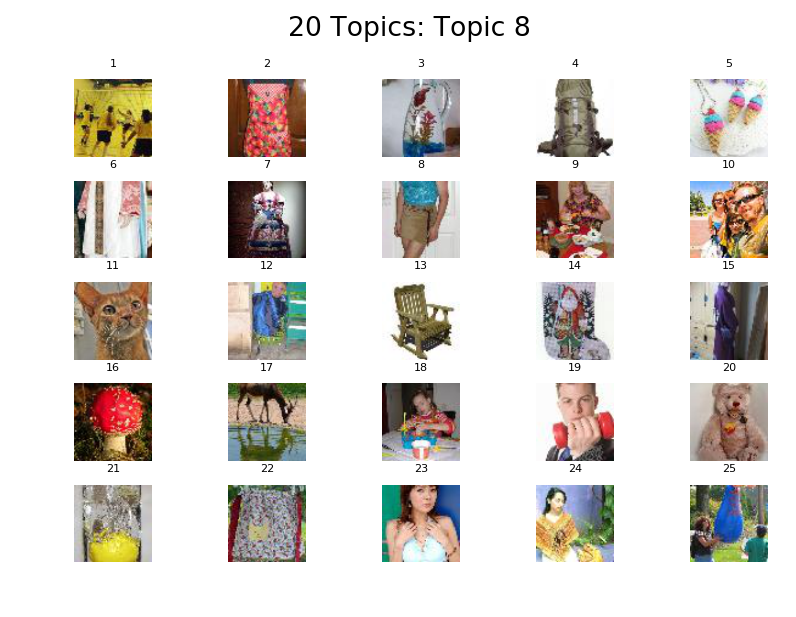

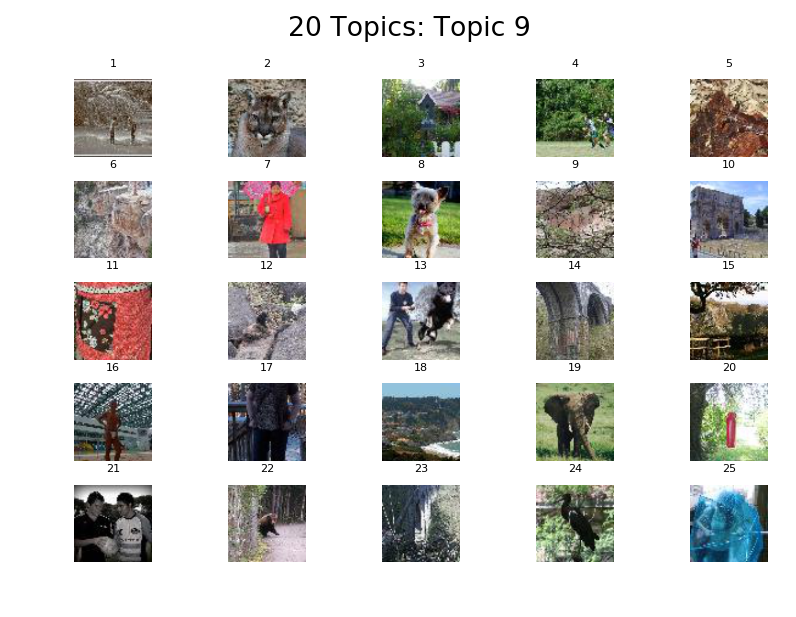

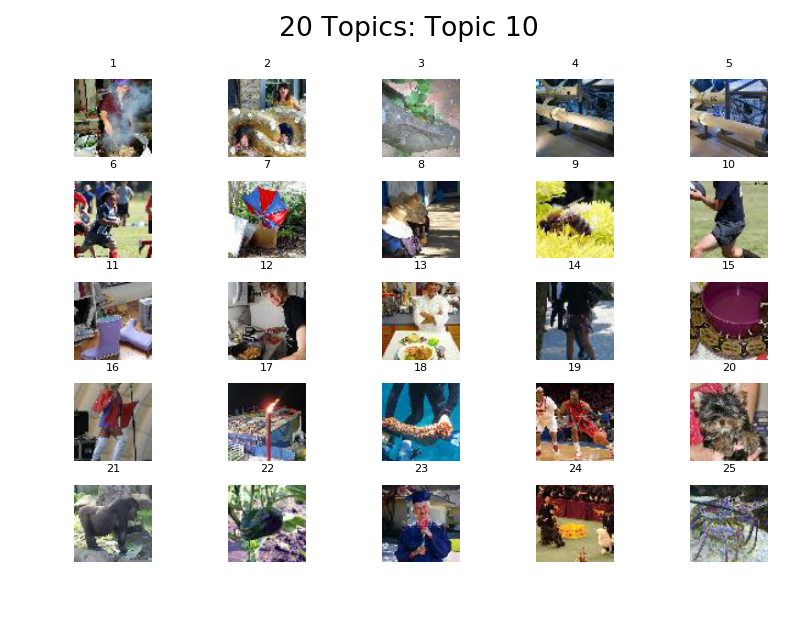

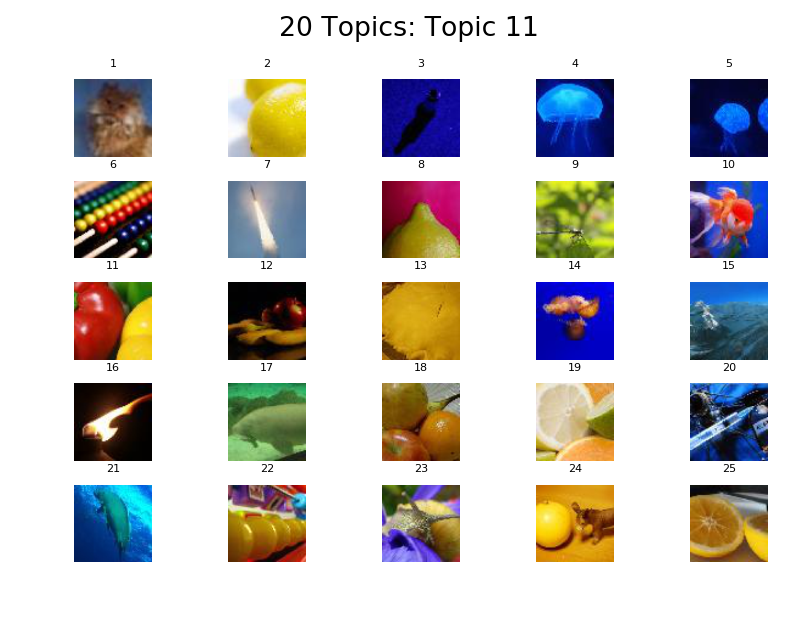

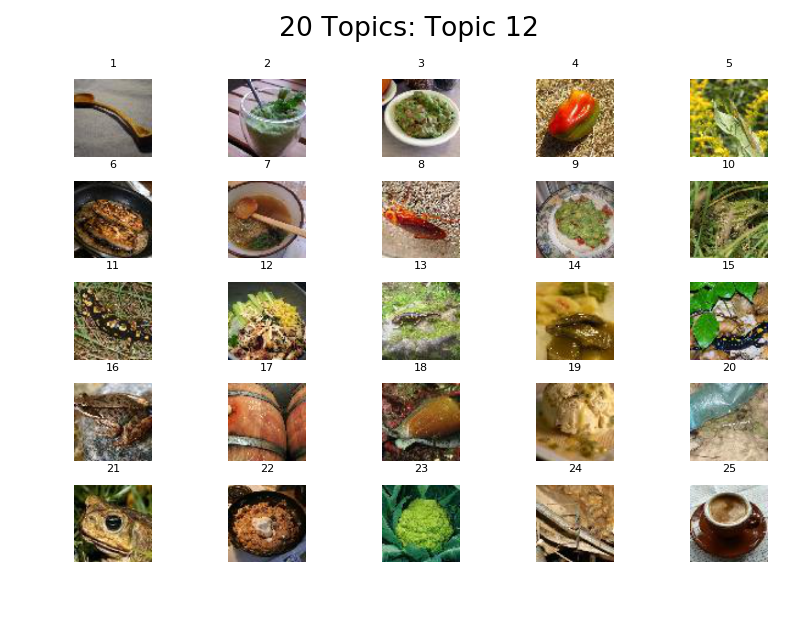

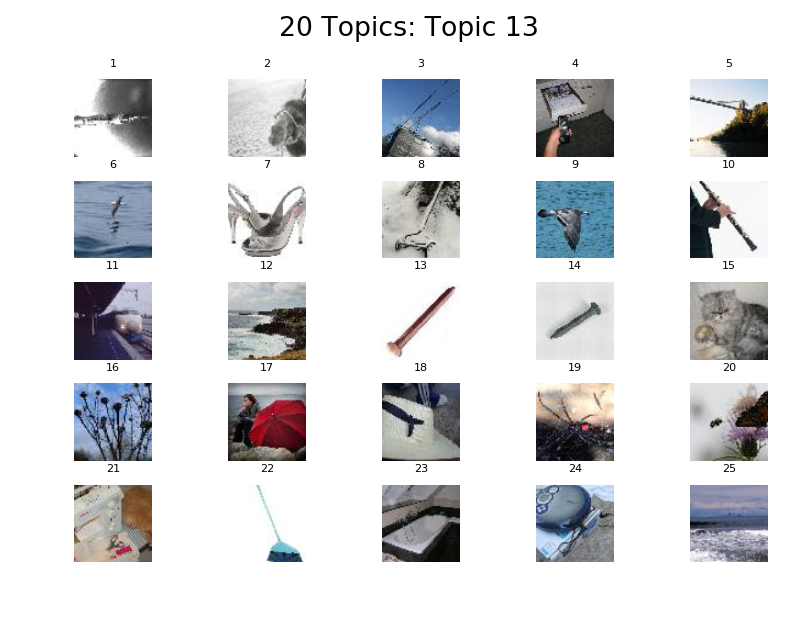

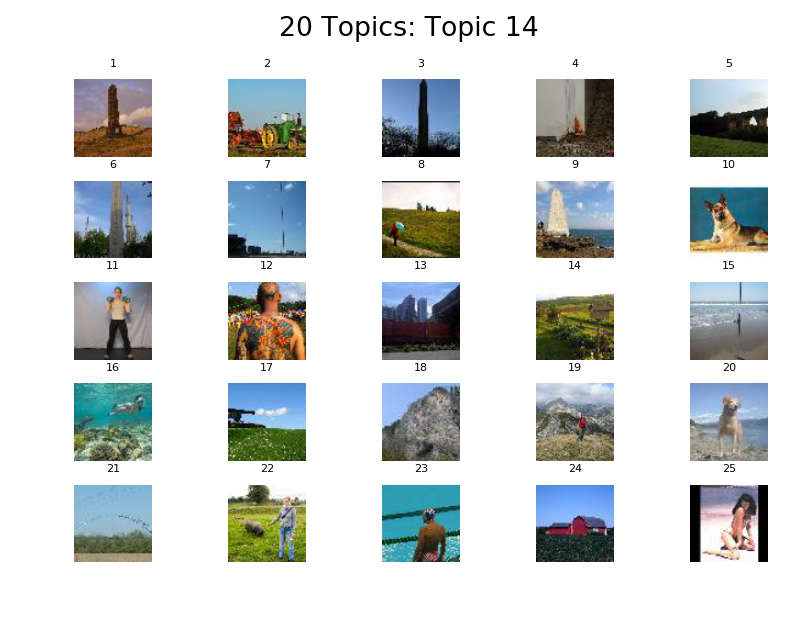

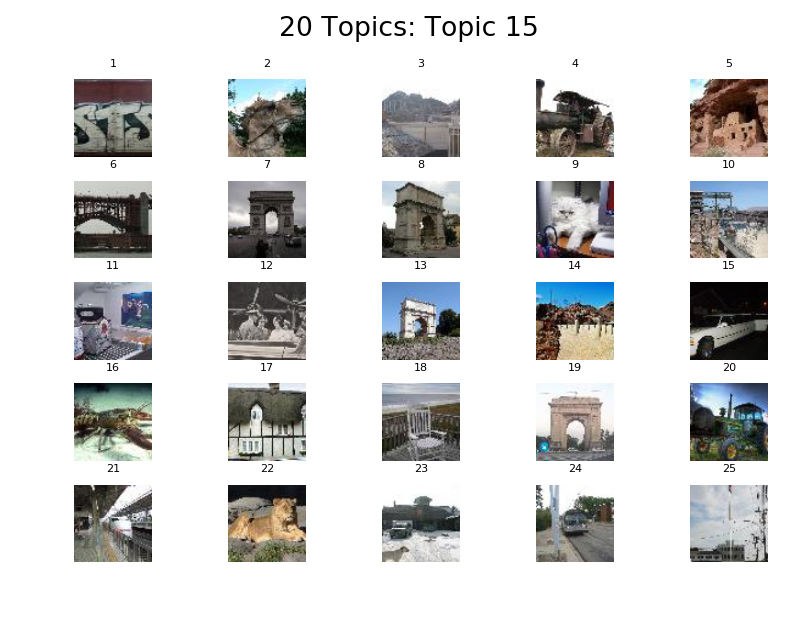

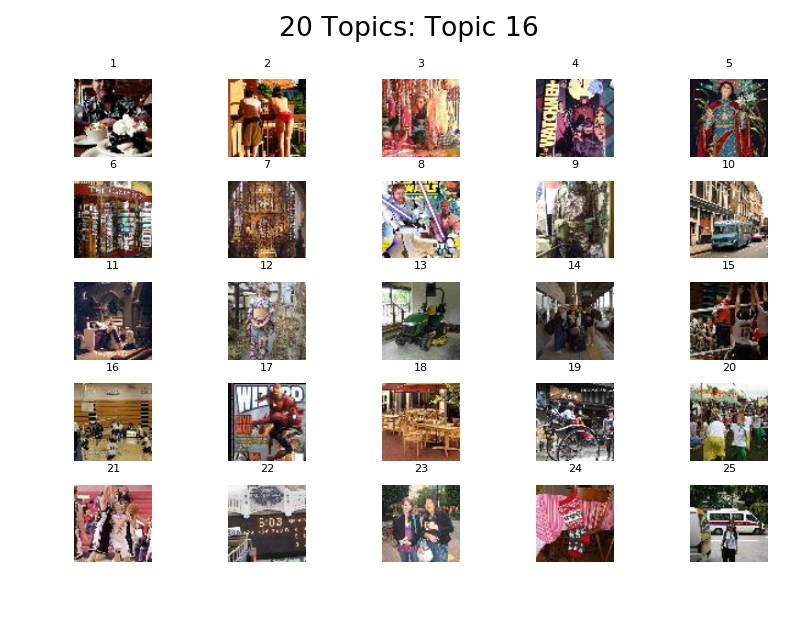

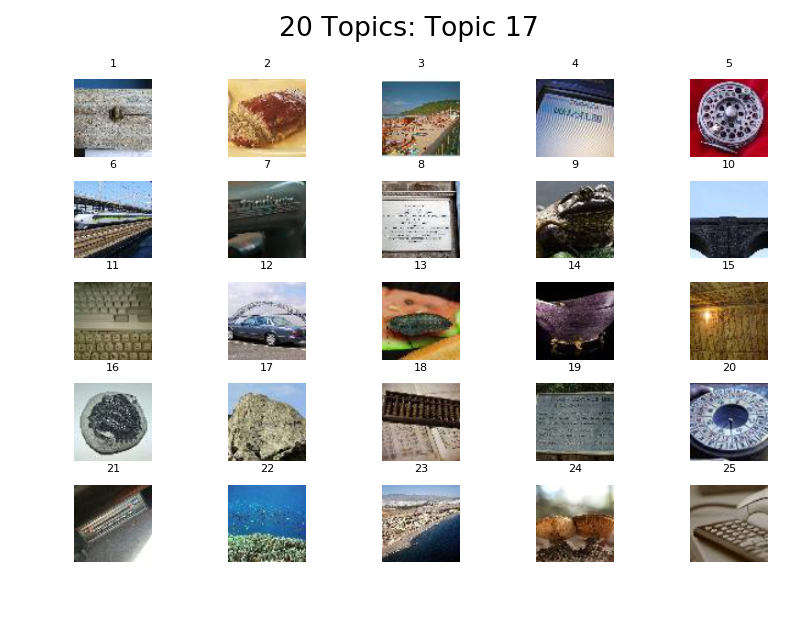

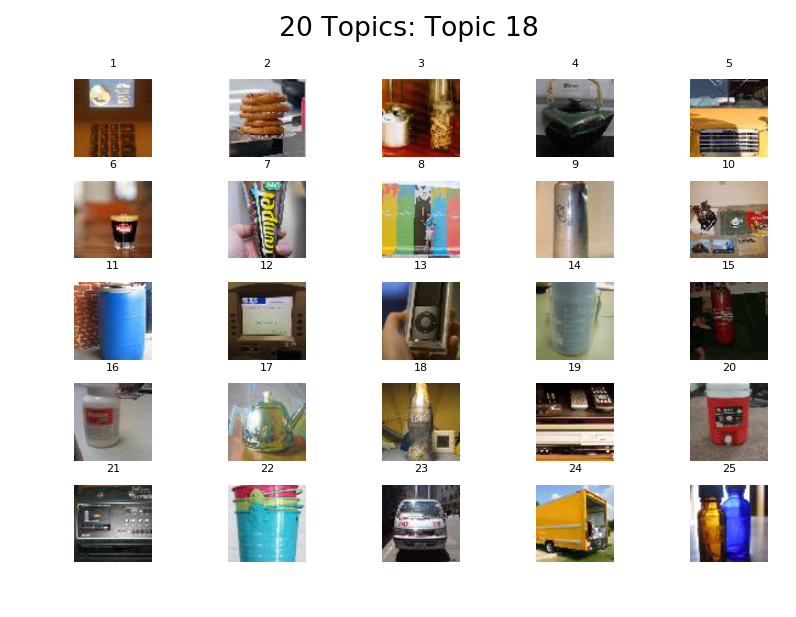

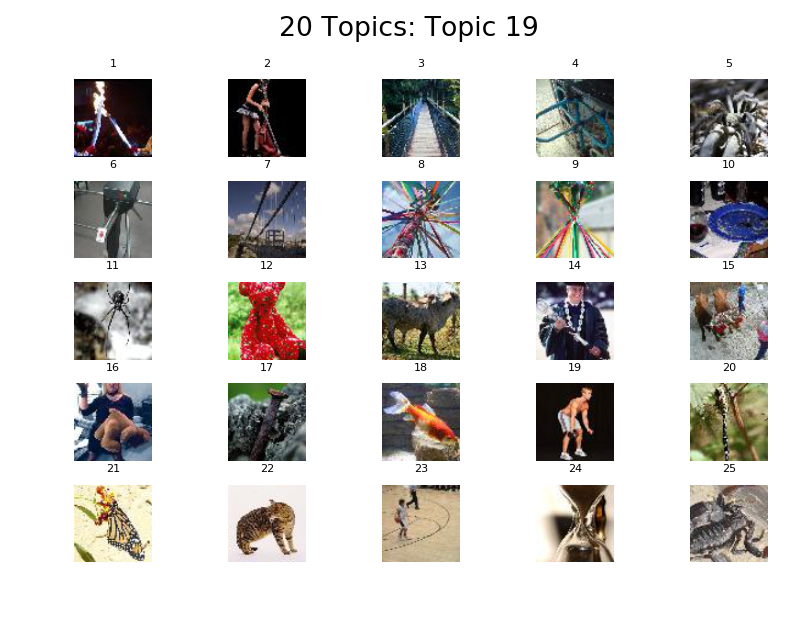

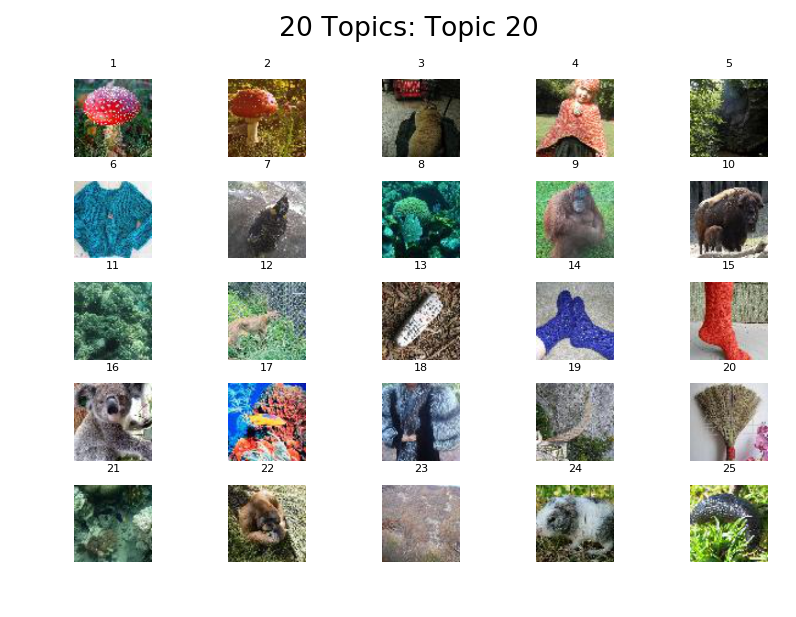

In [9]:
for K in num_topics:
    with open("data/" + str(K) + "-topic-res-fc6.txt", "rb") as fp:
        img_by_topic = pickle.load(fp)  
    
    top_list = range(K)
    for topic in top_list:
        fig, ax = plt.subplots(nrows=5, ncols=5, dpi=160)
        fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.3)
        fig.suptitle(str(K)+' Topics: Topic '+str(topic+1))
        i = 0
        try:
            for row in ax:
                for col in row:
                    I = img_list[img_by_topic[topic][i][0]]
                    i += 1
                    col.axis('off')
                    col.imshow(I)
                    col.set_title(i, fontsize=5)
                    col.imshow(I)         
            plt.show()  
        except:
            print ('No samples in current topic')